# Imports 

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# sklearn modules
from sklearn.preprocessing import StandardScaler

# Load Data From Kaggle

In [4]:

train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

print(train_df.shape, test_df.shape)

(440833, 12) (64374, 12)


# Class Distribution

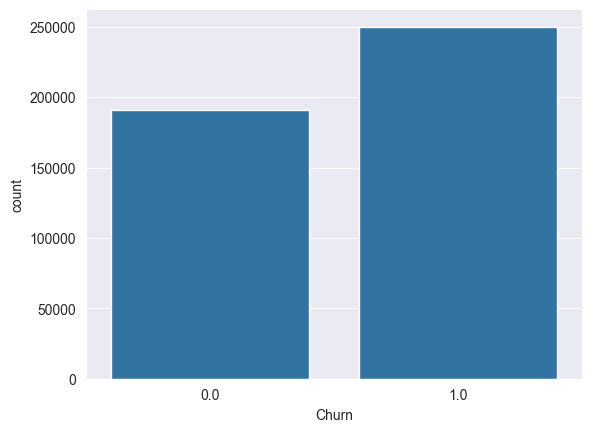

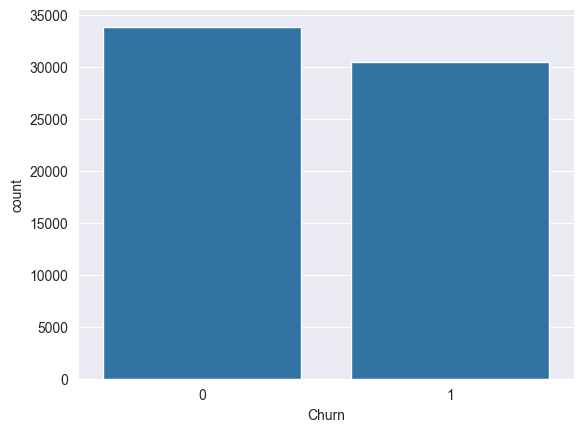

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for data in [train_df, test_df]:
    sns.countplot(x='Churn', data=data)
    plt.show()

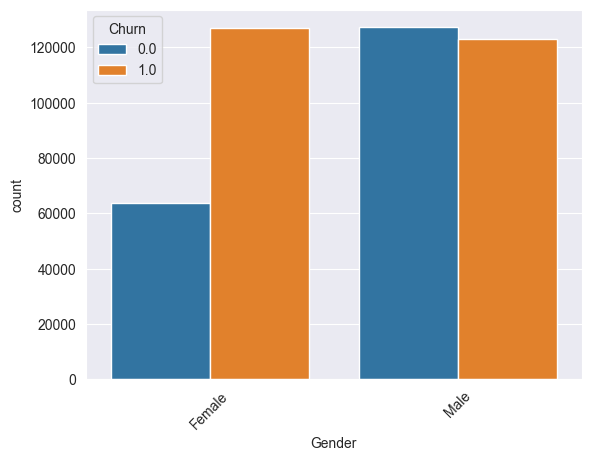

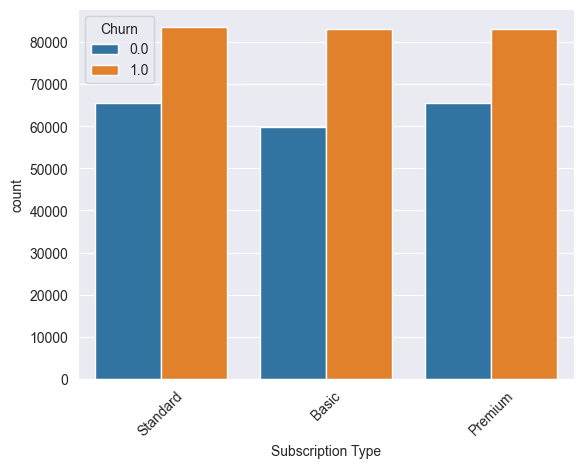

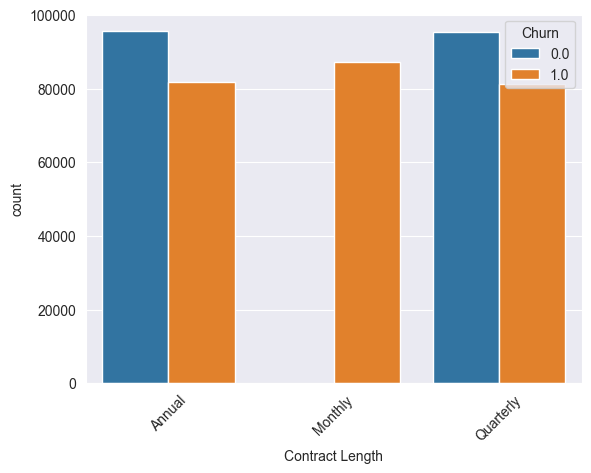

In [6]:
for col in train_df.select_dtypes(include='object'):
    if col != 'Churn':
        sns.countplot(x=col, hue='Churn', data=train_df)
        plt.xticks(rotation=45)
        plt.show()

# remove unnessasry values

In [7]:
test_df.dtypes

CustomerID           int64
Age                  int64
Gender                 str
Tenure               int64
Usage Frequency      int64
Support Calls        int64
Payment Delay        int64
Subscription Type      str
Contract Length        str
Total Spend          int64
Last Interaction     int64
Churn                int64
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
def encode(train, test):
    le = LabelEncoder()

    train = train.copy()
    test = test.copy()

    for col in train.columns:
        if train[col].dtype == 'str' or train[col].dtype.name == 'str':

            le.fit(train[col])

            train[col] = le.transform(train[col])
            test[col] = le.transform(test[col])

    return train, test

In [21]:
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df['Churn'] = train_df['Churn'].astype('int64')
test_df['Churn'] = test_df['Churn'].astype('int64')

train_df , test_df = encode(train_df, test_df)
x_train = train_df[train_df.columns[:-1]]
y_train = train_df[train_df.columns[-1]]
x_test = test_df[test_df.columns[:-1]]
y_test = test_df[test_df.columns[-1]]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, end='\n')

(440832, 11) (440832,) (64374, 11) (64374,)


# Freature Scaling


In [10]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Logistic Regeressing Model

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_prob = lr.predict_proba(x_test)[:, 1]

In [12]:
from sklearn.metrics import (
confusion_matrix,
classification_report,
roc_auc_score,
roc_curve
)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Logistic Regression
[[ 8128 25753]
 [18424 12069]]
              precision    recall  f1-score   support

           0       0.31      0.24      0.27     33881
           1       0.32      0.40      0.35     30493

    accuracy                           0.31     64374
   macro avg       0.31      0.32      0.31     64374
weighted avg       0.31      0.31      0.31     64374

ROC-AUC: 0.29800538242821367


# KNN Model

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
y_prob_knn = knn.predict_proba(x_test)[:,1]


In [19]:
print("KNN Model")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_knn))


KNN Model
[[ 6057 27824]
 [11307 19186]]
              precision    recall  f1-score   support

           0       0.35      0.18      0.24     33881
           1       0.41      0.63      0.50     30493

    accuracy                           0.39     64374
   macro avg       0.38      0.40      0.37     64374
weighted avg       0.38      0.39      0.36     64374

ROC-AUC: 0.3908440213882829


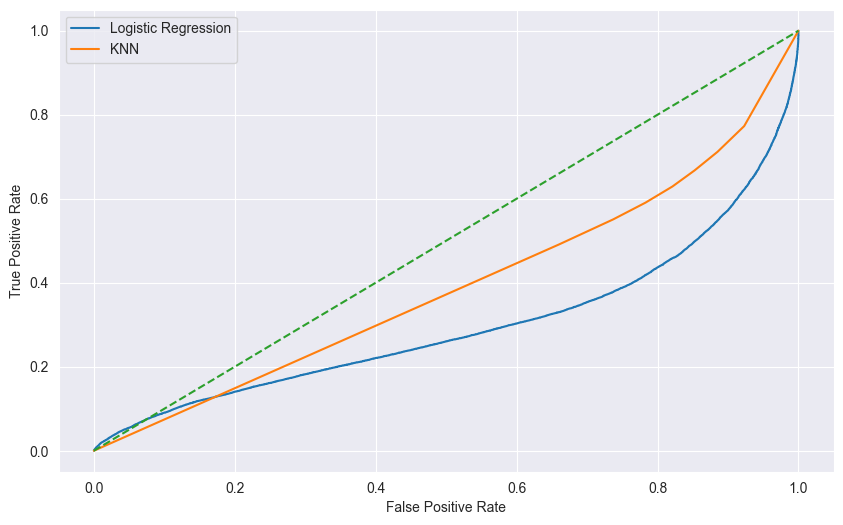

In [22]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
